# Ford GoBike Data Analysis
## Nima Afshar

## Investigation Overview

Bay wheels was primarily a public bicycle sharing system in California which started working in 2013 as "Bay Area Bike Share".
After 5 years in 2018 it had over 2,600 bicycles in 262 stations around San Fransisco, East Bay and San Jose. 
From 2017, Ford Motor company took partnership and company been renamed to Ford GoBike. After Motivate's acquisition by
[Lyft](https://en.wikipedia.org/wiki/Bay_Wheels), the system was renamed to Bay Wheels in June 2021. 

Bay Wheels fleets has two types of bicycles, 1. classic docked model and 2. hybrid model wich can be parked either at a dock
or even without that. Both types of bicycles had contactless smart card reader. they are available 24/7 which can be hired
by customer in different way( single hire, annual membership etc) single rides start at \$3 per ride and can be up to 159
for annual membership.

## Dataset Overview
The dataset used for this exploratory analysis consists of monthly individual trip data
in 2018 from January to Decmber in CSV format.
Data cleaning and wrangling was first performed
and the visualization are made in order to undrestand the usage pattern, some features,
like trip duration, relation between diferent variables in the data etc.
The attributes included the trip start/end time, as well as additional measurements
such as user type, gender, and age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df_new = pd.read_csv('clean_data.csv')

In [3]:
df_new['member_gender'].value_counts()

Male      1256565
Female     426862
Other       26248
Name: member_gender, dtype: int64

In [4]:
# Remove reows that does not have station id
df_new = df_new[df_new['start_station_id'].isnull() == False]
df_new.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709675 entries, 0 to 1709674
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        int64  
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  start_time_day           object 
 17  start_time_hour          int64  
 18  start_month              object 
 19  members_age              int64  
 20  duration_min             float64
dtypes: float

In [5]:
# Change start_time and end_time to datetime format
df_new.start_time = pd.to_datetime(df_new.start_time)
df_new.end_time = pd.to_datetime(df_new.end_time)

df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')

In [6]:
#  "day" of week and "hours" information from the start_time column
df_new['start_time_day']= df_new['start_time'].dt.strftime('%a')
df_new['start_time_hour']= df_new['start_time'].dt.hour
df_new['start_month'] = df_new['start_time'].dt.strftime('%B')


In [7]:
df_new['start_time_day'].value_counts()
df_new['start_month'].value_counts()

October      188684
July         179954
June         177808
August       175232
September    171693
May          164127
November     126721
December     123965
April        119438
March        100384
February      96610
January       85059
Name: start_month, dtype: int64

In [8]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
weekdays_list = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_new['start_time_day'] = df_new['start_time_day'].astype(weekdays_list)

In [9]:
df_new['start_time_day']

0          Wed
1          Wed
2          Wed
3          Wed
4          Wed
          ... 
1709670    Sat
1709671    Sat
1709672    Sat
1709673    Sat
1709674    Sat
Name: start_time_day, Length: 1709675, dtype: category
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']

In [10]:
# Calculate member_age from member_birth_year.
df_new['members_age'] = 2021 - df_new['member_birth_year']


In [11]:
df_new = df_new[df_new['members_age'].isnull() == False]

In [12]:
df_new['members_age'] = df_new['members_age'].astype('int')
df_new['member_birth_year'] = df_new['member_birth_year'].astype('int')

In [13]:
df_new['members_age']

df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709675 entries, 0 to 1709674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1709675 non-null  int64         
 1   start_time               1709675 non-null  datetime64[ns]
 2   end_time                 1709675 non-null  datetime64[ns]
 3   start_station_id         1709675 non-null  object        
 4   start_station_name       1709675 non-null  object        
 5   start_station_latitude   1709675 non-null  float64       
 6   start_station_longitude  1709675 non-null  float64       
 7   end_station_id           1709675 non-null  object        
 8   end_station_name         1709675 non-null  object        
 9   end_station_latitude     1709675 non-null  float64       
 10  end_station_longitude    1709675 non-null  float64       
 11  bike_id                  1709675 non-null  object        
 12  

## User Types and Member Gender and Their Monthly Usage

Subscribers are the most bike users in 2018 (almost 90\%), 
and casual users (customers) are only about 11\%. Both types use bike
more during the summer, subscriber peak was in October and casual users
was in July. Bikes in general for either types are not popular in winter due to weather.

Male and female as majority of members gender consist of 73.5\% and 25\% respectively.
Male use bikes more than female. The most time during the year that male and female 
use bike were in October. 

Other heatmap for Member gender and their monthly usage was not that helpful as they both 
show same habbit and did not give us more insight. Results is not shown here.

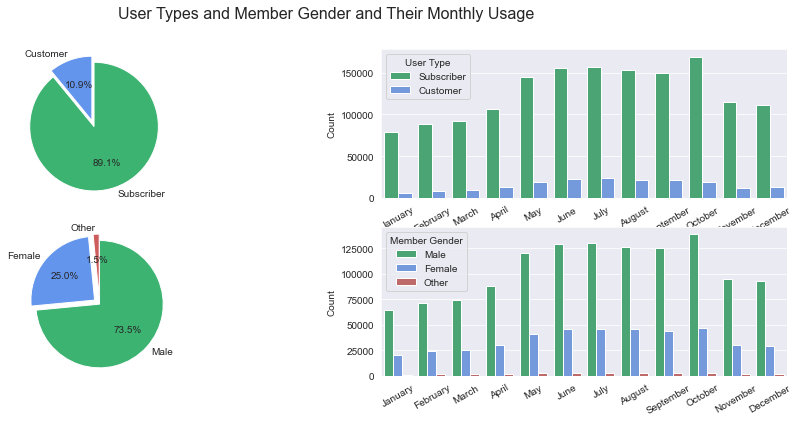

In [14]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(2, 2, 1);
sorted_vals1 = df_new["user_type"].value_counts()/df_new.shape[0];
plt.pie(sorted_vals1, explode=[0, 0.1], labels=sorted_vals1.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors= ['mediumseagreen', 'cornflowerblue']);
plt.axis('square');

plt.subplot(2, 2, 3);
sorted_vals2 = df_new["member_gender"].value_counts()/df_new.shape[0];
plt.pie(sorted_vals2, explode=[0, 0.1, 0.1], labels=sorted_vals2.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors= ['mediumseagreen', 'cornflowerblue', 'indianred']);
plt.axis('square');

plt.subplot(2, 2, 2);
ax = sb.countplot(data=df_new, x='start_month', hue='user_type', hue_order=sorted_vals1.index, palette=['mediumseagreen', 'cornflowerblue']);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');

plt.subplot(2, 2, 4);
ax = sb.countplot(data=df_new, x='start_month', hue='member_gender', hue_order=sorted_vals2.index, palette=['mediumseagreen', 'cornflowerblue', 'indianred']);
ax.legend(title='Member Gender');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');

plt.suptitle('User Types and Member Gender and Their Monthly Usage', fontsize=16);

## Hourly Usage during Weekdays for Customers and Subscribers

Two different pattern for customers and subscribers is shown here. Subscribers use the bike mainly
 during the week perhaps in order to get to work. It is more concentrated during 8 to 9 
 PM and 4 to 6 PM which is when they go to work and go back home.
 Customers usage was more during the weekend. During the week they use bike more in the evening
 around 5 and 6 PM. It seems it can be a good way out of traffic during the rush hours for both customers and 
 subscribers.
 

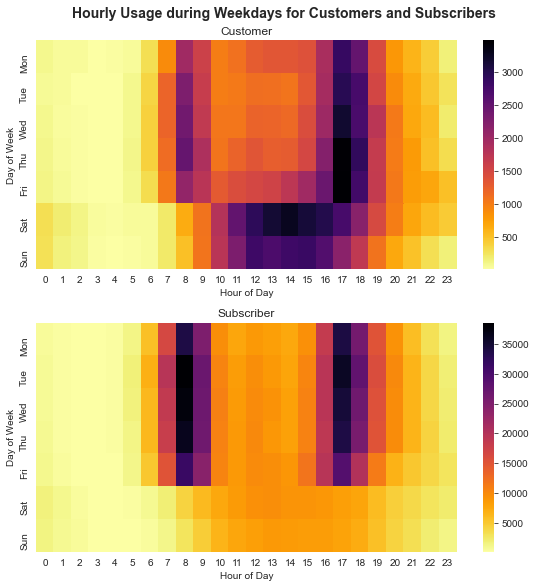

In [15]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='inferno_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='inferno_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Trip Duration for Customers and Subscribers
Subscriber trips are shorter than customers, both of them use bikes more 
during the weekend especially the casual users. Subscriber trip duration are 
almost the same during the week which shows maybe they use it for specific 
route (e.g. going to work) however customers trip duration varies during the week.
Results for trip duration of male and female are not shown here as they have similar habit, however male usage is higher than female.

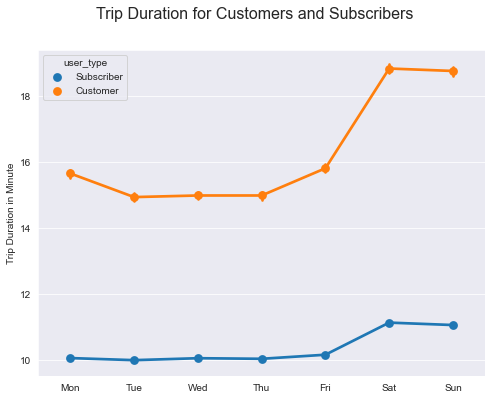

In [16]:
plt.figure(figsize=[8, 6]);
sb.pointplot(data= df_new, x='start_time_day', y='duration_min', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute');
ax.legend(title='User Type');
plt.xlabel('');
plt.suptitle('Trip Duration for Customers and Subscribers', fontsize=16);

## Summary
Numbers of subscribers who use the bike system are much more than casual users.
Maybe because it is cheaper to become a member rather than using it casually.
Bikes for both types are used more during the summer. Subscribers show different habit
compared to customers. They use bike more during the week maybe in order to get to work in the morning 
and go back home in the evening as it is concentrated during 8,9 AM and 4,6 PM.
Customers usage are more during the weekend, they use bike during the week more around 5 PM.
Seems like Subscribers have a plan to use the bike for certain destination every day during the week.
There are still a lot analysis that can be done with this dataset in order
to undrestand the relationship better.

